<a href="https://colab.research.google.com/github/shashiKumar14/projects/blob/main/RECOMMENDATION_SYSYTEM_%26SENTIMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**RECOMMENDATION SYSYTEM**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Sample dataset
data = {
    'book_id': [1, 2, 3, 4, 5],
    'title': ['Book A', 'Book B', 'Book C', 'Book D', 'Book E'],
    'author': ['Author 1', 'Author 2', 'Author 1', 'Author 3', 'Author 2'],
    'genre': ['Fiction', 'Non-Fiction', 'Fiction', 'Sci-Fi', 'Non-Fiction'],
    'description': [
        'A thrilling tale of adventure and mystery.',
        'An informative guide on personal finance.',
        'A heartwarming story of love and friendship.',
        'A futuristic saga of space exploration.',
        'A comprehensive look at the history of science.'
    ]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Combine relevant features into a single string
df['features'] = df['title'] + ' ' + df['author'] + ' ' + df['genre'] + ' ' + df['description']

# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english')

# Fit and transform the combined features
tfidf_matrix = tfidf.fit_transform(df['features'])

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
print("cosine_sim==>",cosine_sim)

# Function to get book recommendations based on book title
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the book that matches the title
    idx = df[df['title'] == title].index[0]

    print("cosine_sim[idx]==>",idx)

    # Get the pairwise similarity scores of all books with that book
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the books based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 5 most similar books
    sim_scores = sim_scores[1:6]

    # Get the book indices
    book_indices = [i[0] for i in sim_scores]

    # Return the top 5 most similar books
    return df['title'].iloc[book_indices]

# Example usage
print("Recommendations for 'Book A':")
print(get_recommendations('Book A'))


cosine_sim==> [[1.         0.15167675 0.16169176 0.08183123 0.15167675]
 [0.15167675 1.         0.15167675 0.0767627  0.26232344]
 [0.16169176 0.15167675 1.         0.08183123 0.15167675]
 [0.08183123 0.0767627  0.08183123 1.         0.0767627 ]
 [0.15167675 0.26232344 0.15167675 0.0767627  1.        ]]
Recommendations for 'Book A':
cosine_sim[idx]==> 0
2    Book C
1    Book B
4    Book E
3    Book D
Name: title, dtype: object


**SENTIMENT ANALYSIS**

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

                         comment     cleaned_comment sentiment
0             I love this video!          love video  POSITIVE
1   This is terrible, I hate it.       terrible hate  NEGATIVE
2      Amazing work, keep it up!   amazing work keep  POSITIVE
3  Not good, very disappointing.  good disappointing  POSITIVE


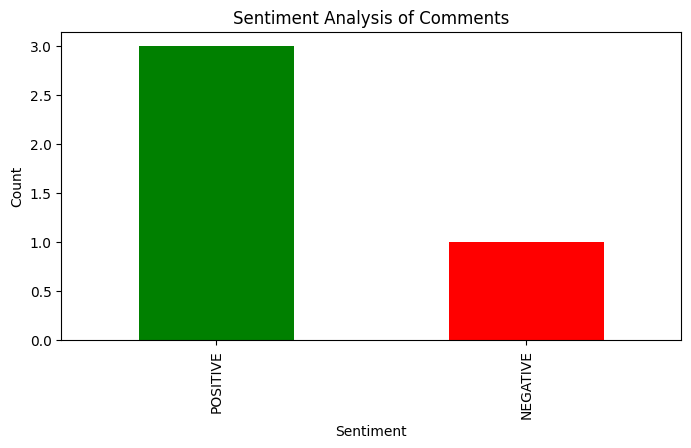

In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
from transformers import pipeline

# Load the data
# data = pd.read_csv('comments.csv')

# Sample data
data = pd.DataFrame({
    'comment': [
        'I love this video!',
        'This is terrible, I hate it.',
        'Amazing work, keep it up!',
        'Not good, very disappointing.'
    ]
})

# Preprocessing function
def preprocess_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])  # Remove stopwords
    return text

# Apply preprocessing
data['cleaned_comment'] = data['comment'].apply(preprocess_text)

# Load pre-trained sentiment analysis model
sentiment_model = pipeline('sentiment-analysis')

# Analyze sentiment
data['sentiment'] = data['cleaned_comment'].apply(lambda x: sentiment_model(x)[0]['label'])

# Save the results to a new CSV
# data.to_csv('sentiment_analysis_results.csv', index=False)

# Print the results
print(data.head())

# Visualization
import matplotlib.pyplot as plt

# Count the sentiment values
sentiment_counts = data['sentiment'].value_counts()

# Plot the sentiment distribution
plt.figure(figsize=(8, 4))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Analysis of Comments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()
